# Prepare the workspace - load Keras, Tensorflow

In [1]:
from __future__ import print_function
import keras
from keras import utils
from keras.utils import plot_model
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

# Import the MNIST dataset + create variables for our test and training data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


# CNN specific shape of the data

In [3]:
# input image dimensions of MNIST data
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# Preprocess the data
Note we do not shape it into a 1D vector of size 28*28 = 784 here, but rather keep the images as 28 x 28 x 1 to be used with 2D convolution layer.

Compare this preprocessing steps in the code MNIST_HelloWorld_DLinR code!

In [4]:
# rescale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


## The y data is an integer vector with values ranging from 0 to 9.  To prepare this data for training we one-hot encode the vectors into binary class matrices

In [5]:
# One hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (60000, 10)
y_test shape: (10000, 10)


# Build the model
Building the neural network requires configuring the layers of the model then compiling the model.

# Setup the layers

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
#project 3 : Add the two layers should be added here to run the full code!
#model.add(Conv2D())
#model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Print the details of the model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,770,634 (10.57 MB)

 Trainable params: 2,770,634 (10.57 MB)

 Non-trainable params: 0 (0.00 B)

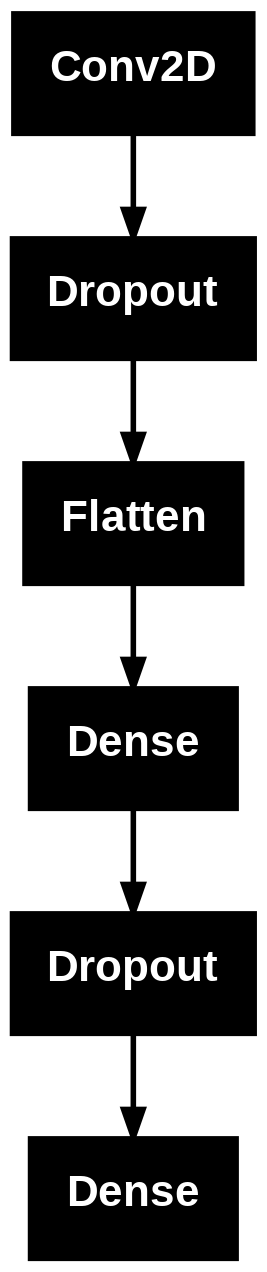

In [7]:
#keras.utils.print_summary(model)
model.summary()
# You can also plot instead
keras.utils.plot_model(model)

# Compile the model - define loss and optimizer

In [8]:
model.compile(
  loss= 'categorical_crossentropy',
  optimizer= 'adam',
  metrics=['accuracy']
  )

# Train the model

In [9]:
history = model.fit(
  x_train, y_train,
  epochs=30, batch_size=128,
  validation_split=0.2
)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8506 - loss: 0.4946 - val_accuracy: 0.9707 - val_loss: 0.0998
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9683 - loss: 0.1047 - val_accuracy: 0.9796 - val_loss: 0.0722
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9798 - loss: 0.0669 - val_accuracy: 0.9830 - val_loss: 0.0582
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9834 - loss: 0.0535 - val_accuracy: 0.9844 - val_loss: 0.0558
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9876 - loss: 0.0408 - val_accuracy: 0.9852 - val_loss: 0.0524
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9895 - loss: 0.0320 - val_accuracy: 0.9847 - val_loss: 0.0573
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9917 - loss: 0.0262 - val_accuracy: 0.9856 - val_loss: 0.0530
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9920 - loss: 0.0253 - val_accuracy: 0.

## The history object returned by fit() includes loss and accuracy metrics which we can plot

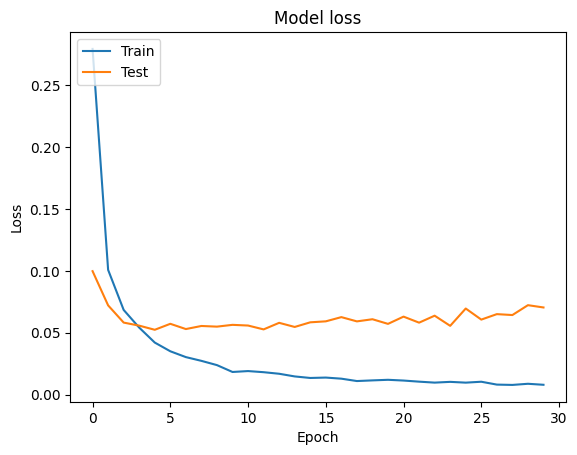

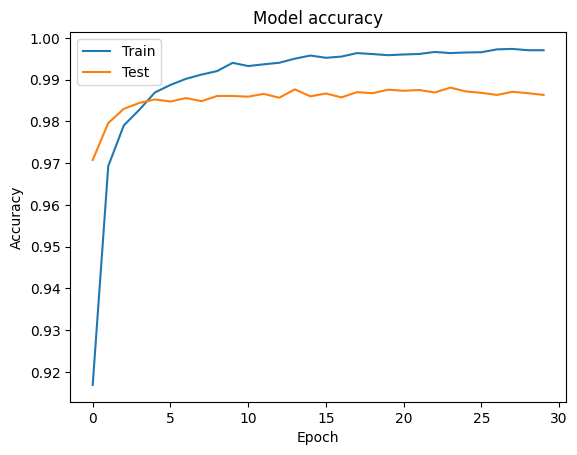

In [10]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### evaulating result

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06483037024736404
Test accuracy: 0.9865999817848206


# Project 3
## Add two layers after the initial convolutional layer in "Setup the layers" above
1. Convolutional layer with kernel size 3 x 3 with relu
2. Maxpool layer with size 2 x 2
### Submit the code chunk below
It should be of the form:

---
```
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Your convolutional layer here!)
model.add(Your maxpool layer here!)
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
```
---

## Make sure you ran the full code with these two additional layers added, and report the final training accuracy value, test accuracy value.


### **Q1**

In [12]:
# Enter your code chunk here
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
# model.add(Your convolutional layer here!)
# model.add(Your maxpool layer here!)
model.add(Conv2D(64, (3, 3), activation='relu')) #adding a layer with double the filters so that as network gets deeper it learns more complex features.
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Q2**

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

### **Q3**
The number of trainable parameters now are 1,199,882. The model had a total of 2,770,634 trainable parameters before adding the two layers. The reduction in the number of trainable parameters can be attributed to the addition of the MaxPooling2D layer which reduces the spatial dimensions of the feature map and hence reduces the number of parameters that need to be learned by the model in the subsequent layers.

### **Q4**

In [14]:
model.compile(
loss= 'categorical_crossentropy',
optimizer= 'adam',
metrics=['accuracy']
)
history = model.fit(
x_train, y_train,
epochs=30, batch_size=128,
validation_split=0.2)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8324 - loss: 0.5276 - val_accuracy: 0.9800 - val_loss: 0.0640
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9714 - loss: 0.0965 - val_accuracy: 0.9865 - val_loss: 0.0476
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9771 - loss: 0.0746 - val_accuracy: 0.9862 - val_loss: 0.0453
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9823 - loss: 0.0566 - val_accuracy: 0.9893 - val_loss: 0.0383
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9852 - loss: 0.0457 - val_accuracy: 0.9891 - val_loss: 0.0390
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9875 - loss: 0.0404 - val_accuracy: 0.9891 - val_loss: 0.0378
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9888 - loss: 0.0382 - val_accuracy: 0.9903 - val_loss: 0.0358
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9898 - loss: 0.0306 - val_accuracy: 0

In [15]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Training loss:', score[0])
print('Training accuracy:', score[1])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Training loss: 0.010247275233268738
Training accuracy: 0.9982333183288574
Test loss: 0.03286760300397873
Test accuracy: 0.9930999875068665


After adding the two layers, the training and testing accuracy was 99.7% and 99.05% respectively. The testing accuracy has just improved slightly after adding the two layers considering the fact it was 98.6% before. There is also a reduction in the test loss after adding the two layers. This is because by adding the two layers, the model is extracting more complex features. The model is also generalizing better now (not overfitting) as highlighted by the improvement in both the testing accuracy and loss values.